In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from tqdm import tqdm
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from sklearn.metrics import silhouette_score
sns.set_theme()
tqdm.pandas()

In [2]:
df_original = pd.read_excel("data/P1-golden.xlsx")
df_augmented = pd.read_csv("data/balanced_augmentation_dataset.csv")

In [3]:
df_original.head()

reviews  Judgement
0  Well done Microsoft!! OneNote is a fantastic p...          1
1  This works on a limited basis.  Works well for...          1
2  This app was great for the first month or two....          1
3  I can't update it in my phone it takes way too...          1
4                                Why is it so big?!!          1

In [4]:
df_augmented.head()

Reviews  Labeler  Useful?  \
0  I give it 5 stars  it almost had everything I ...  Romario        1   
1  I like this app and I segues to make stronger ...  Romario        1   
2        So far does everything I want it to.     \n  Romario        0   
3  This app provides a lot of value for my phone ...  Romario        0   
4  This is a wonderful app for figuring out what ...  Romario        0   

  Comments Original_type  
0      NaN           mis  
1      NaN           mis  
2      NaN           mis  
3      NaN           mis  
4      NaN           mis

In [5]:
df_augmented.rename(columns = {"Reviews": "reviews", "Useful?":"Judgement"}, inplace=True)

In [6]:
df_original.shape, df_augmented.shape

((1000, 2), (1732, 5))

In [7]:
df_combined = pd.concat([df_original, df_augmented])

In [8]:
useful = df_combined[df_combined.Judgement==1]

In [9]:
useful

reviews  Judgement Labeler  \
0     Well done Microsoft!! OneNote is a fantastic p...          1     NaN   
1     This works on a limited basis.  Works well for...          1     NaN   
2     This app was great for the first month or two....          1     NaN   
3     I can't update it in my phone it takes way too...          1     NaN   
4                                   Why is it so big?!!          1     NaN   
...                                                 ...        ...     ...   
1727  Nowhere close to Android version that I've bee...          1     NaN   
1728  I was at one point happy with this map until N...          1     NaN   
1729  I somewhat agree with one other review about t...          1     NaN   
1730  Calibration does not work right on the update ...          1     NaN   
1731  I love this app Please update so I can continu...          1     NaN   

     Comments Original_type  
0         NaN           NaN  
1         NaN           NaN  
2         NaN           NaN  
3         NaN           NaN  
4         NaN           NaN  
...       ...           ...  
1727      NaN           Usa  
1728      NaN       Dep,Usa  
1729      NaN           Usa  
1730      NaN       Dep,Sup  
1731      NaN           Sup  

[1350 rows x 5 columns]

# Choosing the optimal k:

## On the dataset used for the model:

### Silhouette scores:

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:23<00:00,  1.21it/s]


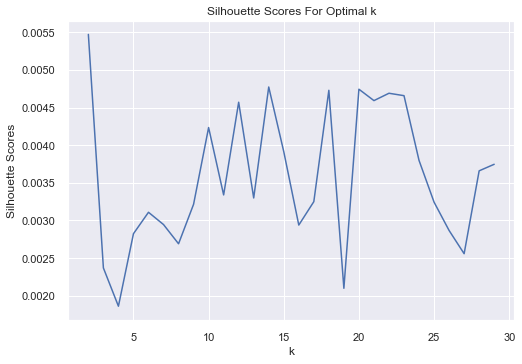

In [114]:
sum_of_squared_distances = []
K = range(2,30)
sil_scores = []
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(useful.reviews)
for k in tqdm(K):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=42)
    #km = km.fit(X)
    preds = km.fit_predict(X)
    #sum_of_squared_distances.append(km.inertia_)
    sil_scores.append(silhouette_score(X, preds))
# plt.plot(K, sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores For Optimal k')
plt.show()

### Elbow Method:

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

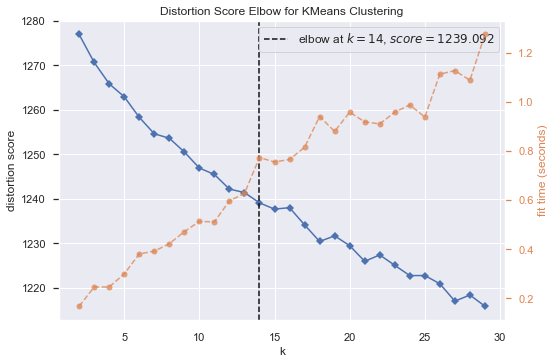

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=4), k=(2, 30))

In [115]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(useful.reviews)
kelbow_visualizer(KMeans(random_state=4), X, k=(2,30))

Due to the low silhouette score and unclear elbows, we supplement this data with more data from the emse dataset:

## Using all the available data:

In [10]:
additional_data_1 = pd.read_csv("./emse19/emse19/emse19/Training Dataset/review_and_label.csv")

In [11]:
additional_data_1["Judgement"] = additional_data_1["Label"].apply(lambda x: 1 if "mis" not in x.lower() else 0)

In [12]:
additional_data_1_useful = additional_data_1[additional_data_1["Judgement"]==1]
additional_data_1_useful.rename(columns={"Reviews":"reviews", "Label": "label"}, inplace=True)

C:\Users\Romario\AppData\Local\Temp\ipykernel_9996\291426577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_data_1_useful.rename(columns={"Reviews":"reviews", "Label": "label"}, inplace=True)


In [13]:
additional_data_2_useful = pd.read_csv("data/emse_test_data_positive.csv")

In [14]:
new_useful = pd.concat([useful,additional_data_1_useful, additional_data_2_useful ])

In [15]:
new_useful = new_useful.drop_duplicates(subset=["reviews"])

### Silhouette Scores:

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [01:38<00:00,  3.50s/it]


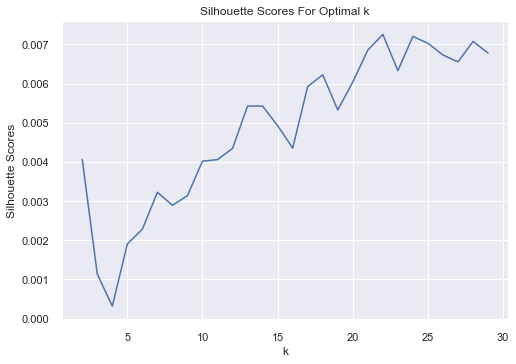

In [116]:
sum_of_squared_distances = []
K = range(2,30)
sil_scores = []
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(new_useful.reviews)
for k in tqdm(K):
    km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=42)
    #km = km.fit(X)
    preds = km.fit_predict(X)
    sil_scores.append(silhouette_score(X, preds))

plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores For Optimal k')
plt.show()

### Elbow Method:

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\Python 3.10\lib\site-packages\sklearn\utils\validation.py:727

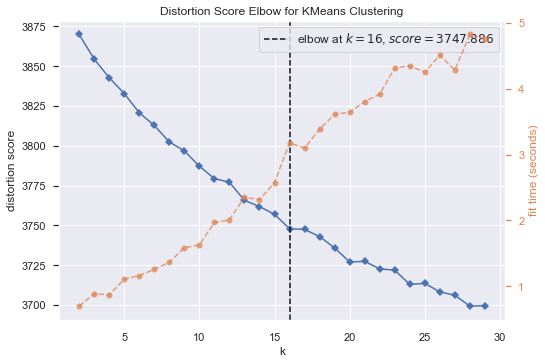

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=4), k=(2, 30))

In [117]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(new_useful.reviews)
kelbow_visualizer(KMeans(random_state=4), X, k=(2,30))

The silhouette scores are low, suggesting overlap between clusters. This is expected, as the reviews are not guaranteed to only talk about issues in one particular part of the app. Since the larger dataset has a k=16 based on the elbow method, we select this value as the optimal k.

# Final Clustering:

In [16]:
km = KMeans(n_clusters=16, max_iter=200, n_init=10, random_state=42)
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(new_useful.reviews)
clusters = km.fit_predict(X)

# Analysis of clusters:

In [17]:
new_useful["cluster"] = clusters

In [18]:
def generate_word_cloud(df):
    review_words = []
    for review in df.reviews:
        review_words += word_tokenize(review)

    review_words = [word.lower() for word in review_words]
    words_to_exclude = ["app"]
    review_words = [word for word in review_words if word not in words_to_exclude]
    review_words = " ".join(review_words)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = set(STOPWORDS),
                    min_font_size = 10).generate(review_words)

    plt.figure(figsize = (14,14))
    plt.imshow(wordcloud)
    plt.axis("off")
    


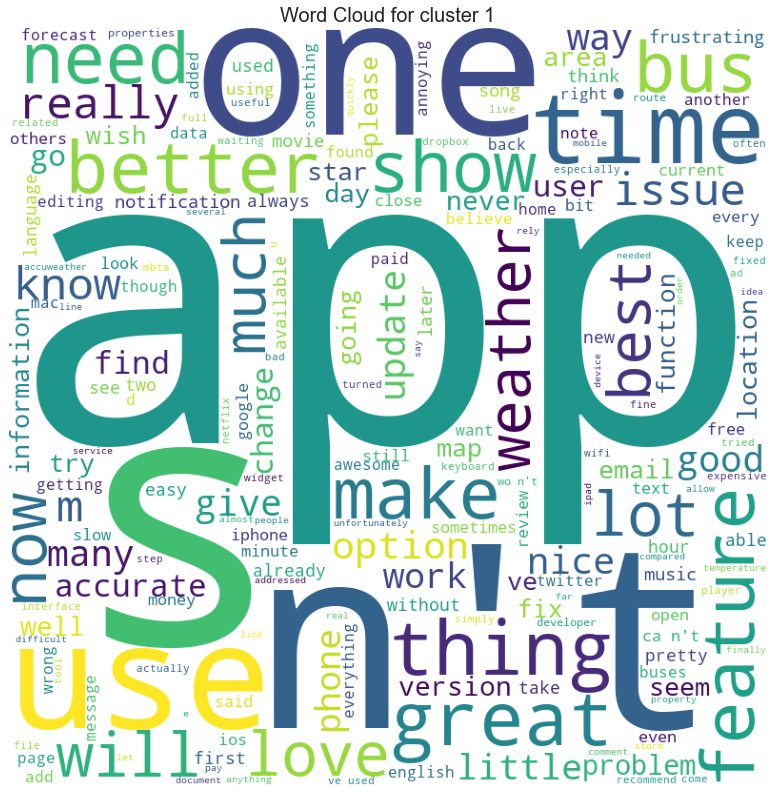

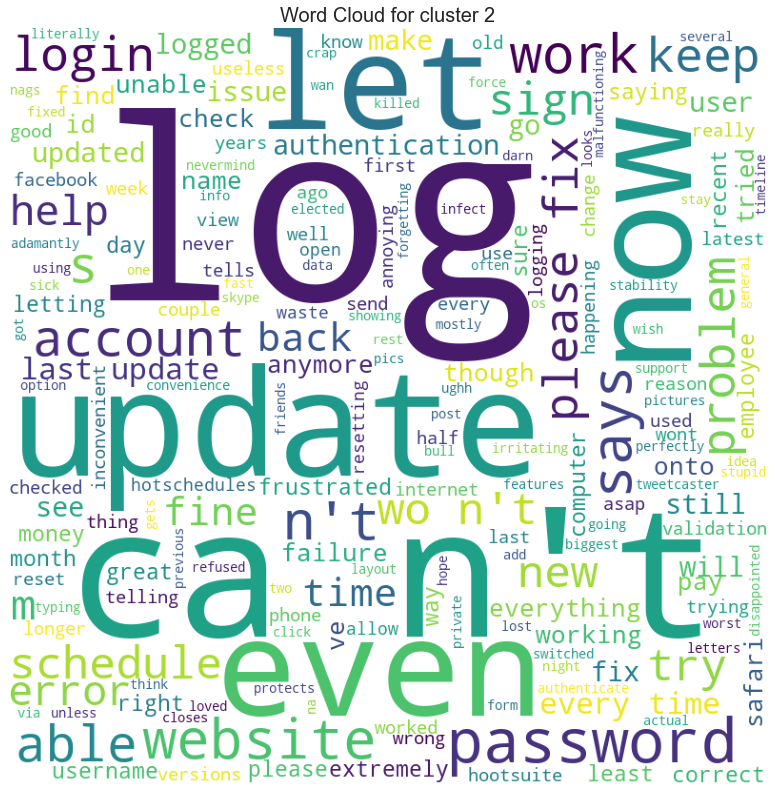

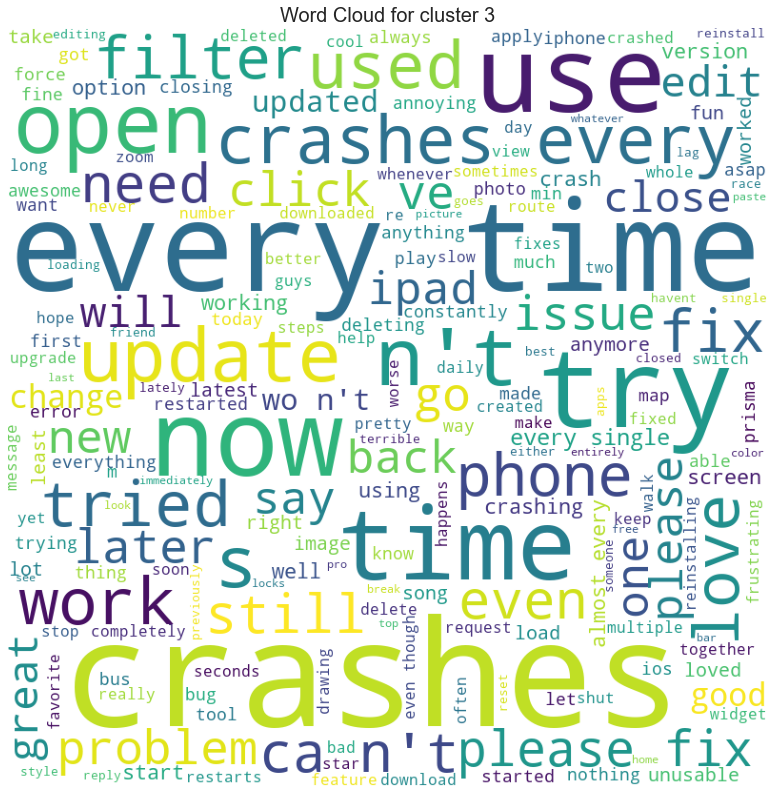

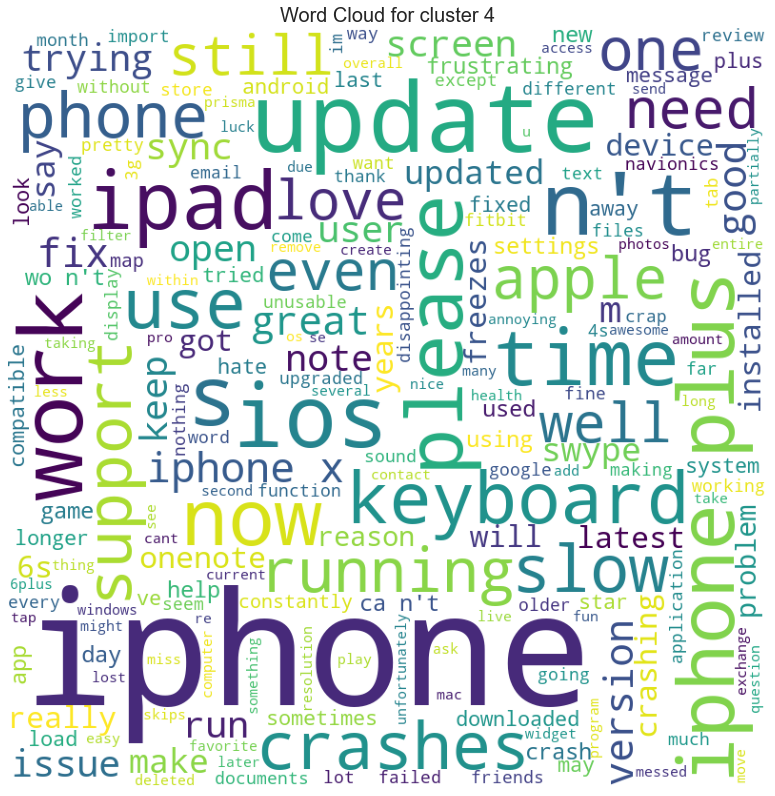

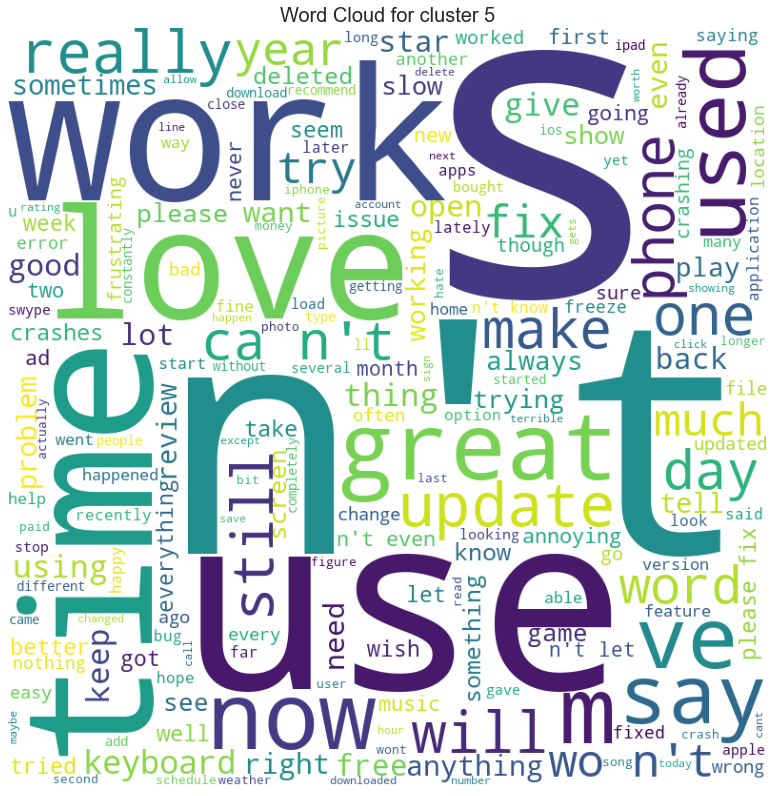

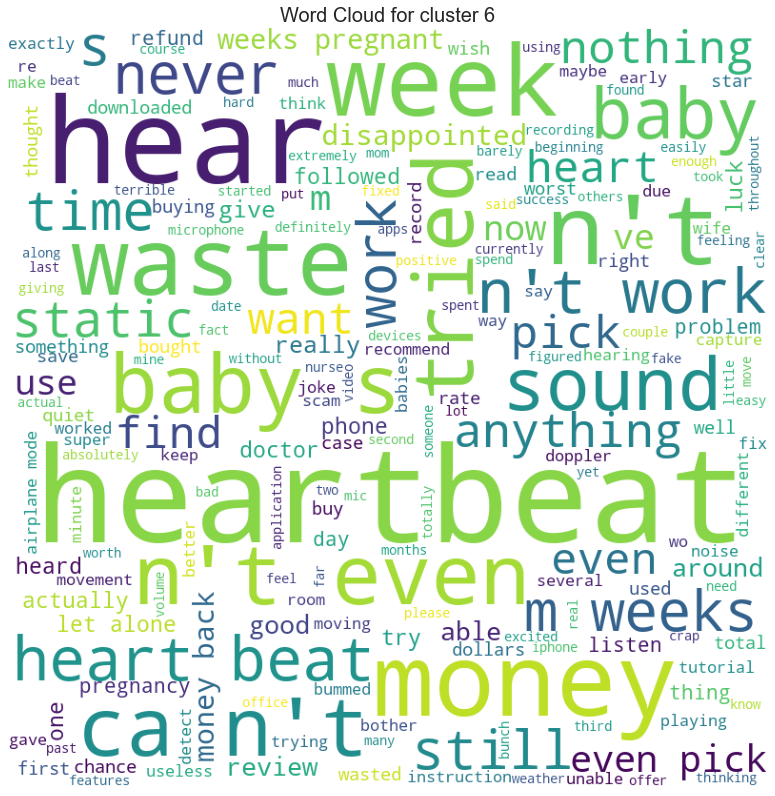

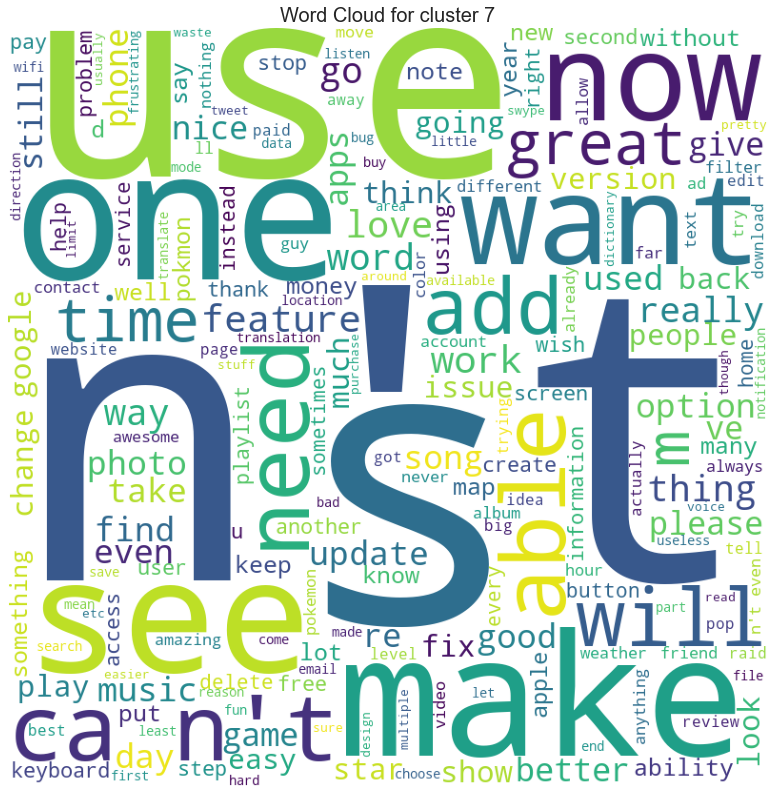

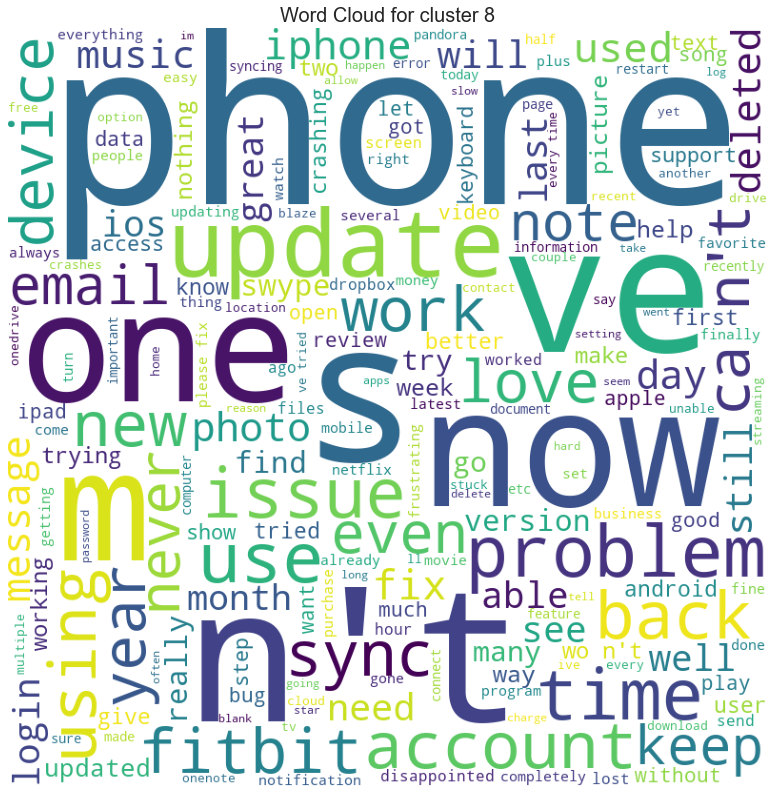

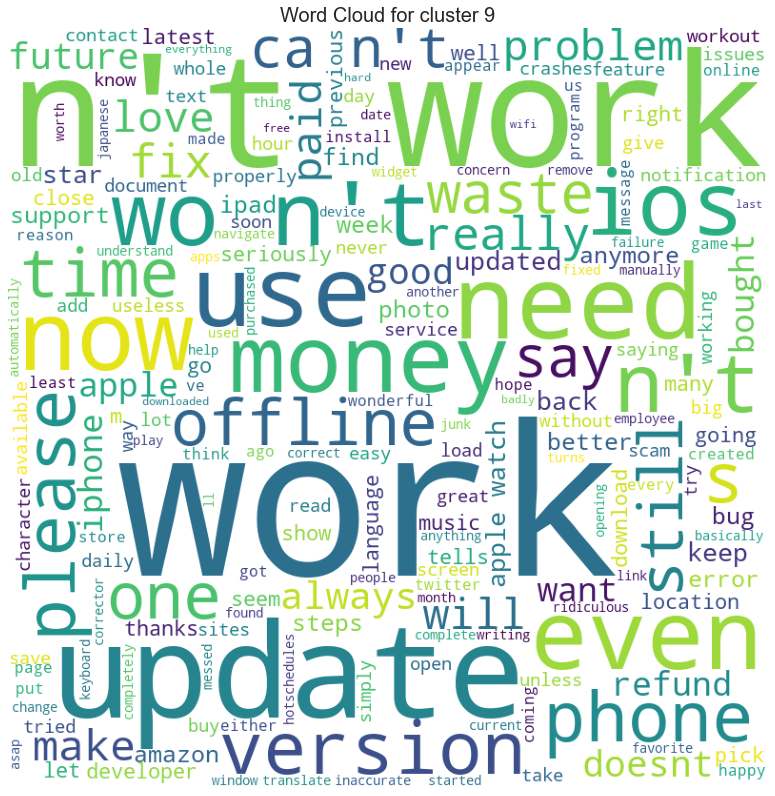

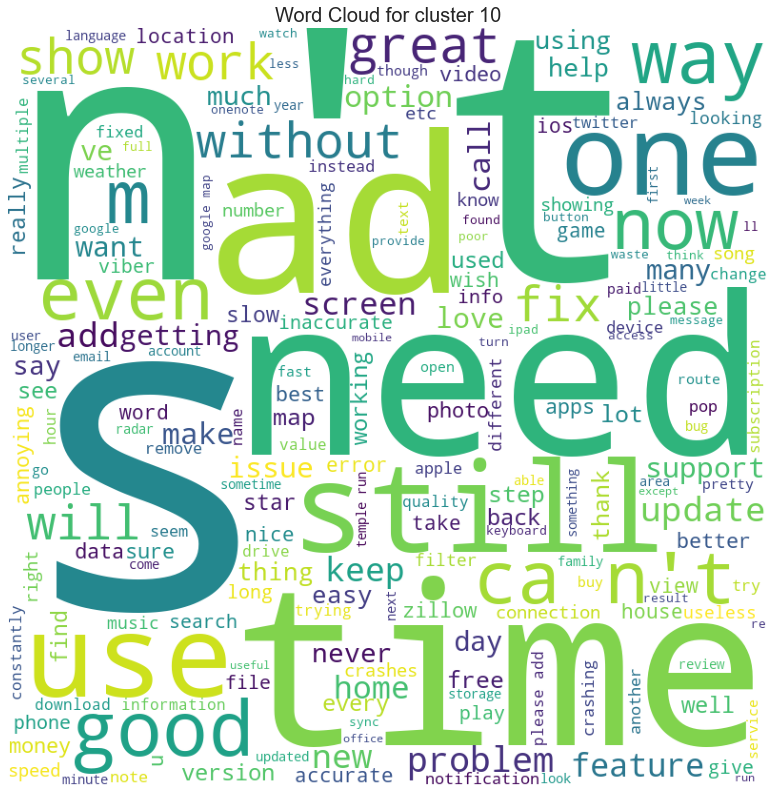

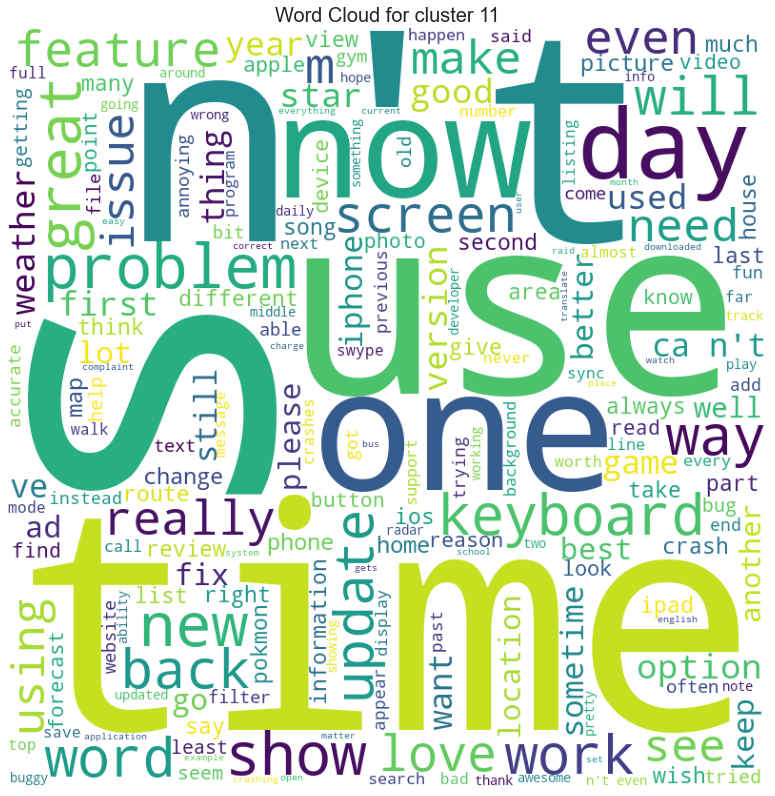

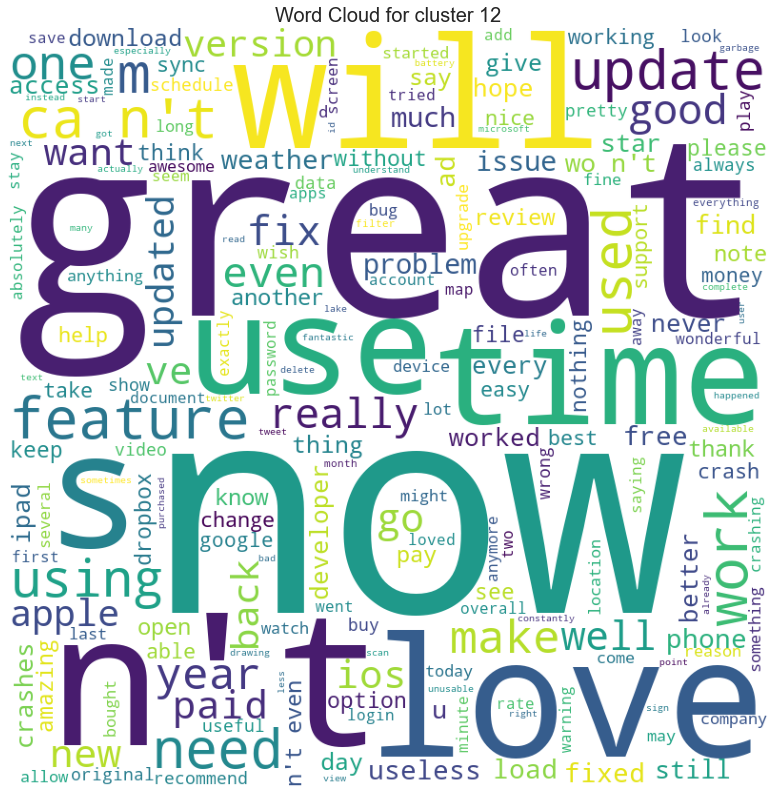

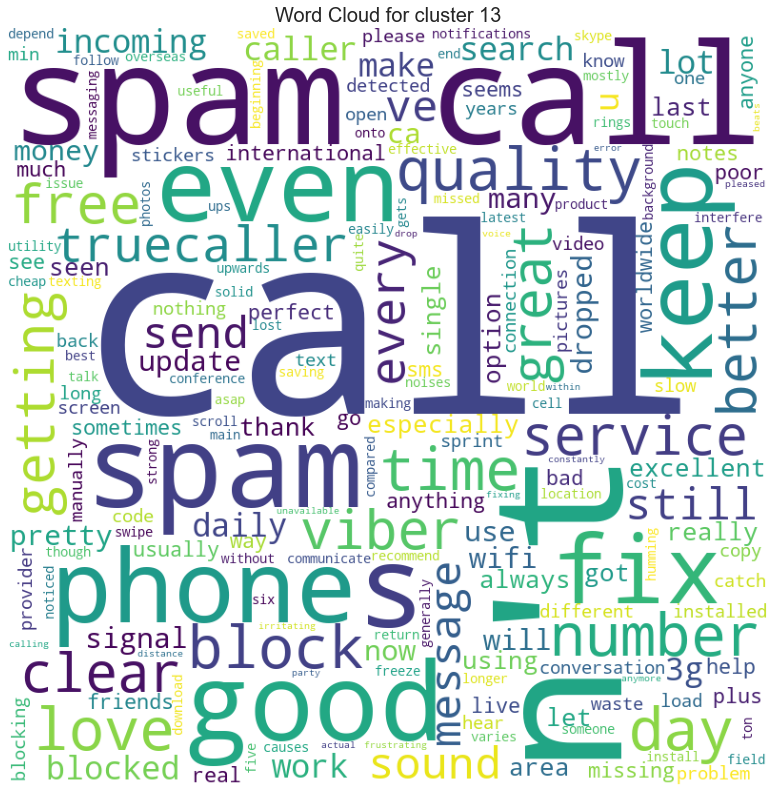

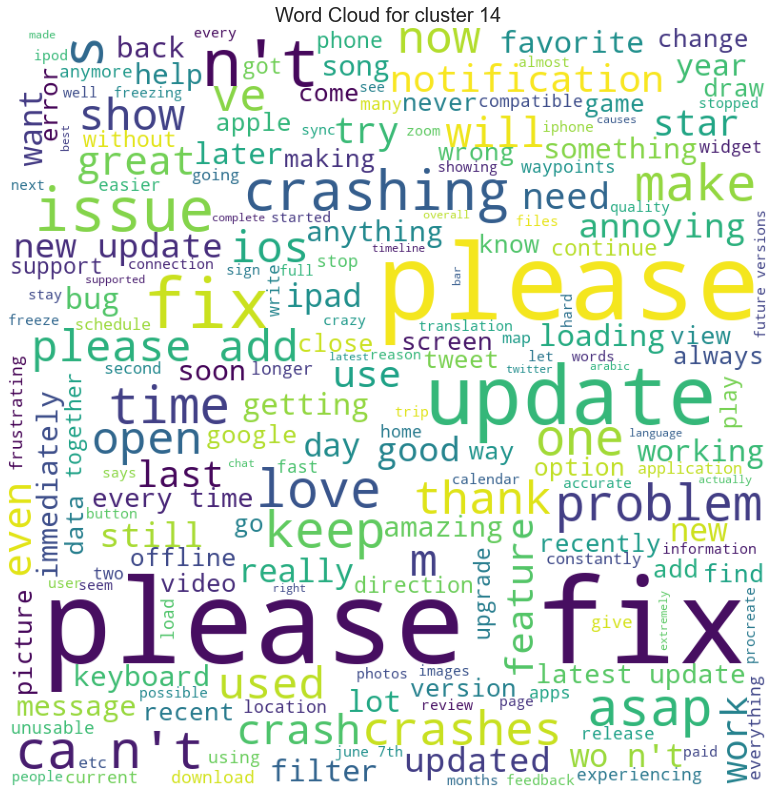

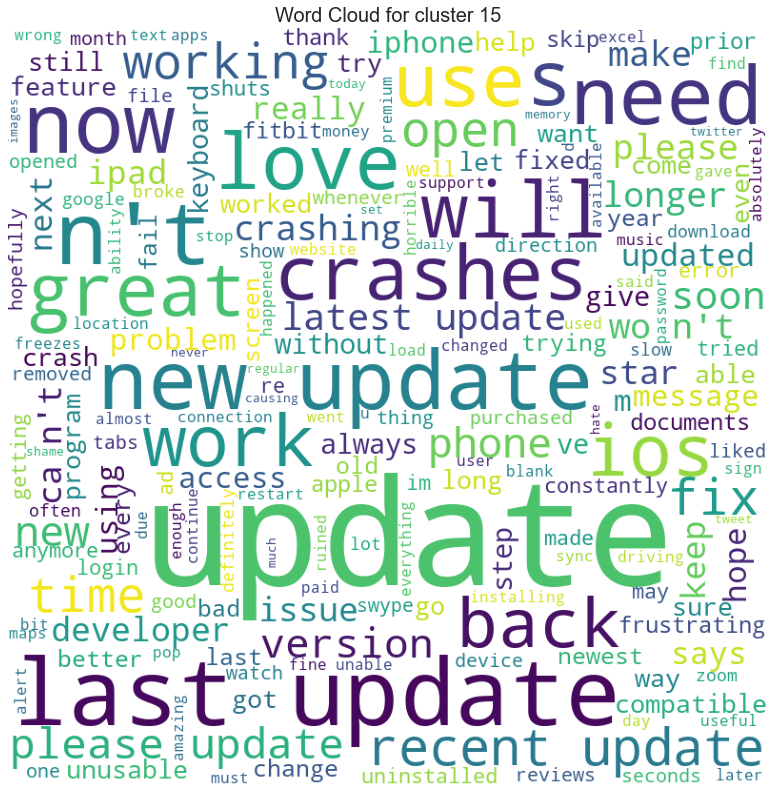

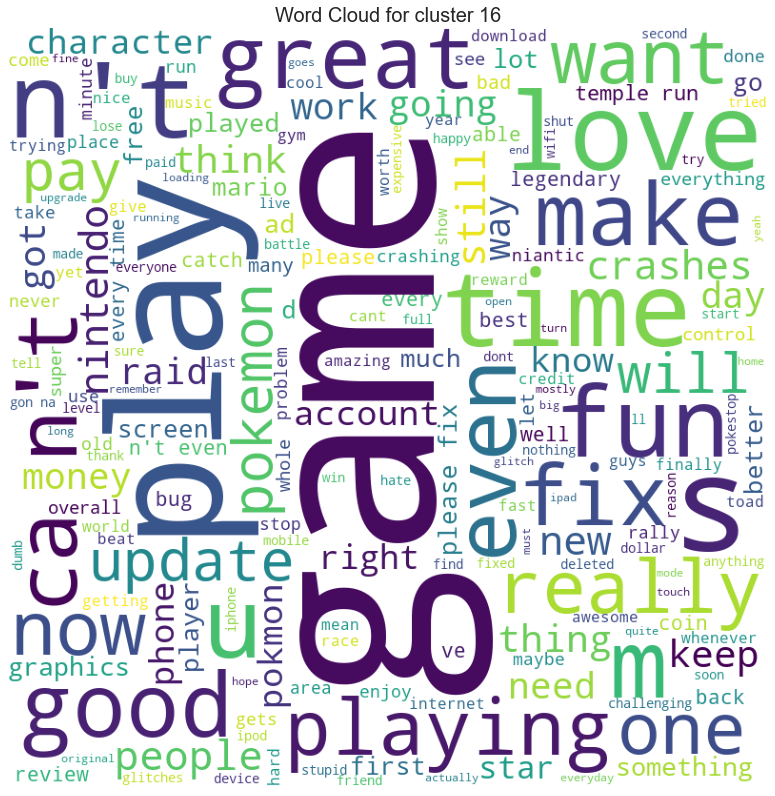

In [26]:
for i in range(16):
    temp = new_useful[new_useful["cluster"]==i]
    generate_word_cloud(temp)
    plt.title("Word Cloud for cluster " + str(i+1), fontsize=20)
    plt.show()
    

In [31]:
for i in range(16):
    print(f"\n\nCluster Number {i+1} examples:")
    for rev in  new_useful[new_useful["cluster"]==i].reviews.sample(5):
        print(rev)



Cluster Number 1 examples:
Autocorrect needs to be more obvious when it replaces a phrase. I will look at the word I just typed, see that is correct, and move on, only to sometimes catch later that an entire phrase has been replaced incorrectly. Makes for an aggravating experience. I like what they are trying to do, but the intelligence isn't there yet. Phrase replacement ought to be an option than can be turned off.      

I liked the app before the change. The changes take a little getting use to though. Do not mind that I need to scroll more since everything is right there without going to another screen. This app is still better than the builtin one that came with the phone.     

Directions, and bus tracking is a bit atrocious. It's alright app for a bus tracking substitute, it would be nice to have all of the buses to know when is close by, rather just one at a single tracking time and the direction it's going.
I am frustrated that I purchased this app. The only drawing app tha

Interpretations:
Cluster #1: Users generally happy, but face minor inconveniences

Cluster #2: Login/authentication issues

Cluster #3: Crash Issues

Cluster #4: iOS/Apple Specific issues

Cluster #5: Users happy, no issues (probably mislabeled data) / Uncertain what the cluster refers to

Cluster #6: Main functionality of app does not work

Cluster #7: Frustrations, along with suggestions for improvement

Cluster #8: Data and syncing issues

Cluster #9: Main functionality of app does not work

Cluster #10: User Interface (Unsure)

Cluster #11: Usability frustrations

Cluster #12: Uncertain what the clusters are representing

Cluster #13: Issues/suggestions for the calling features

Cluster #14: Feature and fix requests

Cluster #15: Issues with the updates

Cluster #16: Gaming Reviews

Text(0.5, 1.0, 'Distribution of the clusters in the data')

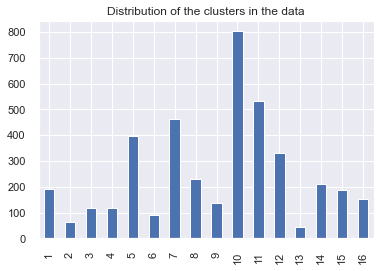

In [41]:
(new_useful["cluster"]+1).value_counts().sort_index().plot(kind="bar") # Plus 1 because it is zero-indexed
plt.title("Distribution of the clusters in the data")

In [112]:
vectorizer.transform(["What is the meaning of life?"])

<1x4437 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [113]:

km.transform(vectorizer.transform(["What is the meaning of life?"]))

ValueError: X has 4437 features, but KMeans is expecting 7673 features as input.